In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [2]:
# Import required packages from EDA
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/heart_failure_clinical_records_dataset.csv')

# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [5]:
df.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


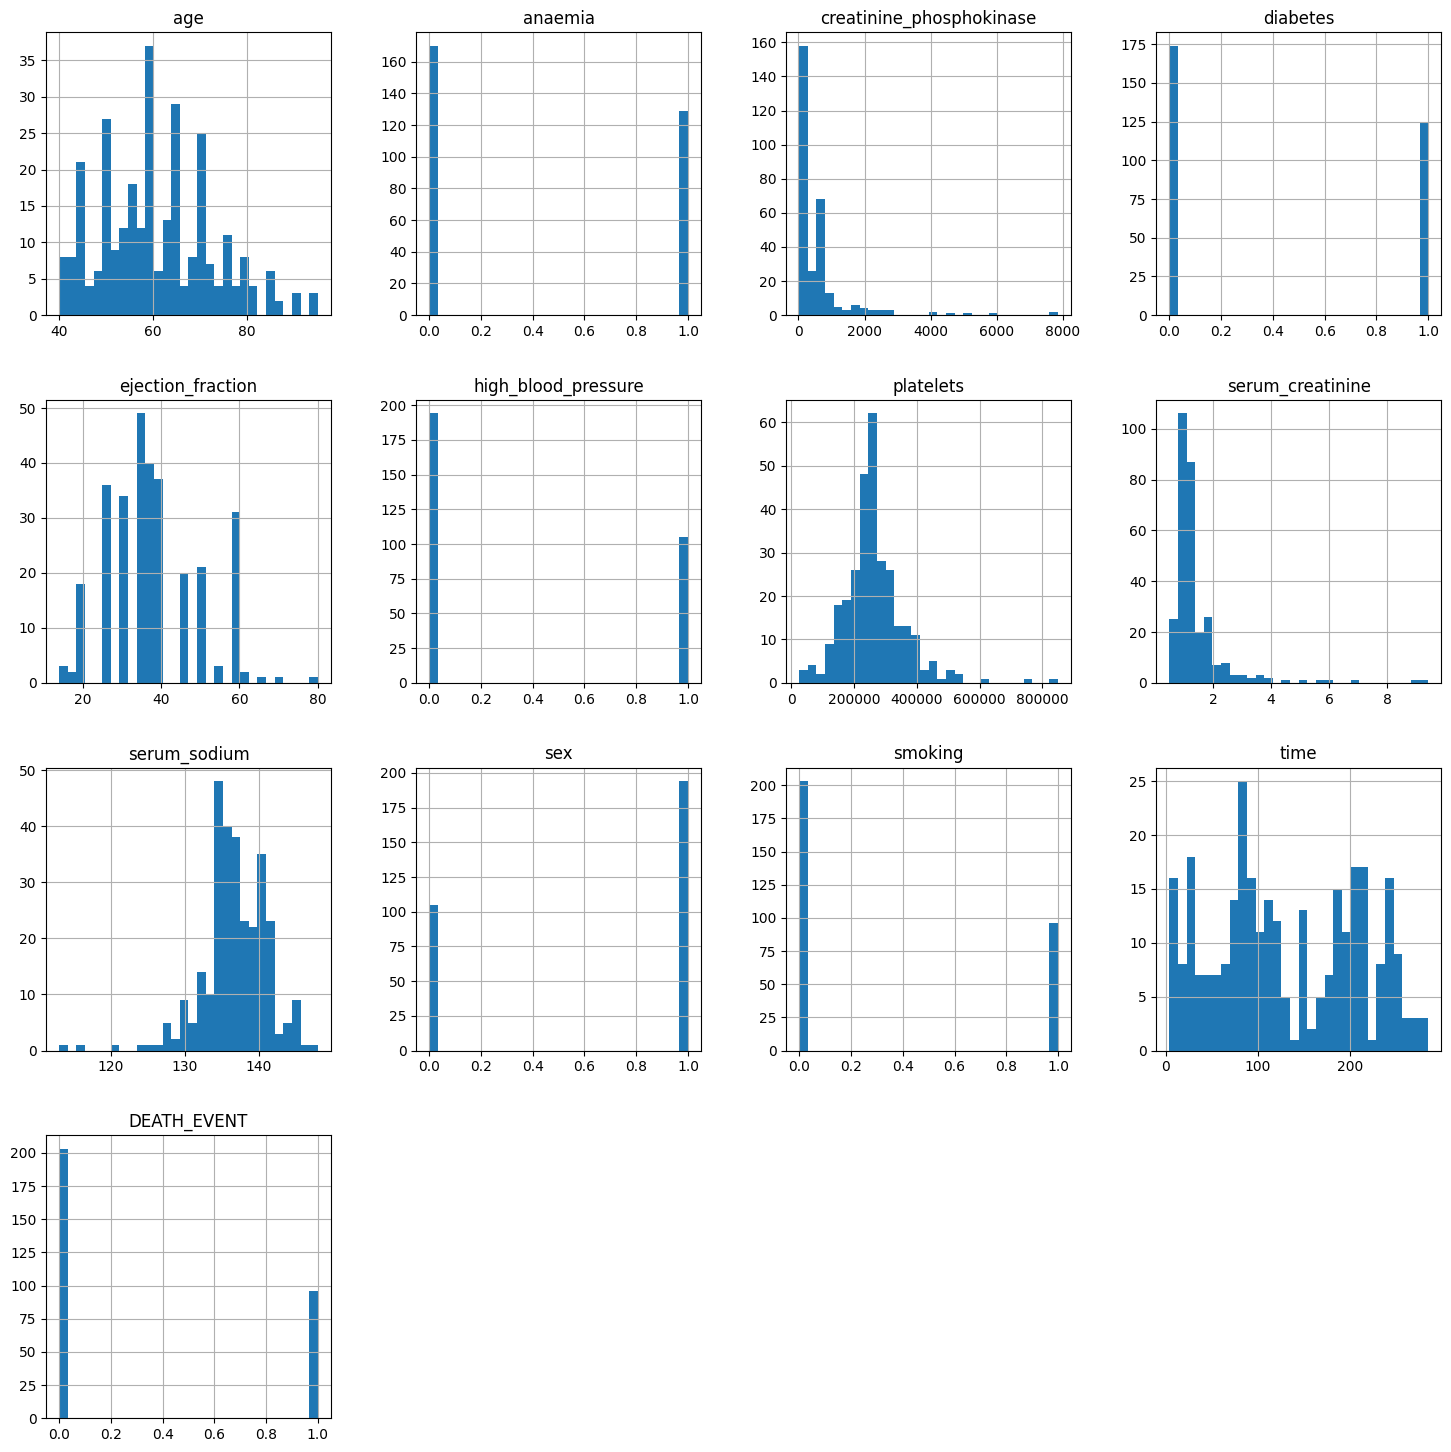

In [8]:
fig = plt.figure(figsize=(18,18))
ax= fig.gca()
df.hist(ax=ax,bins =30)
plt.show()

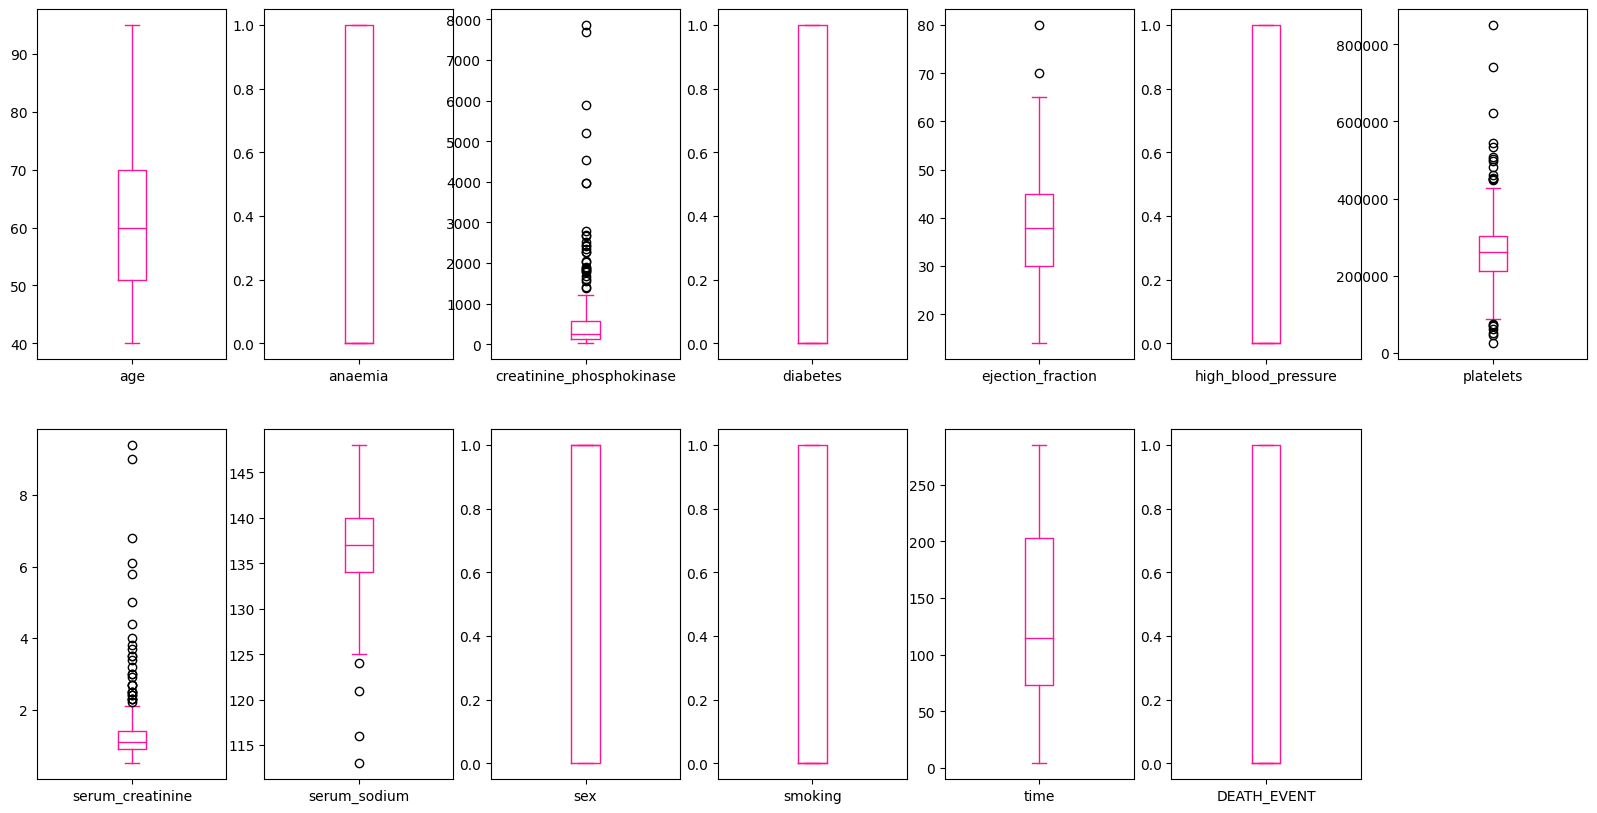

In [ ]:
df.plot(kind='box', subplots=True,layout=(2,7),sharex=False,sharey=False, figsize=(20,10),color='deeppink');


In [ ]:
#identify the outliers
# define continuous variable & plot
continous_features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','DEATH_EVENT']  
def outliers(df_out, drop = False):
  for each_feature in df_out.columns:
    feature_data = df_out[each_feature]
    Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
    Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
    IQR = Q3-Q1 #Interquartile Range
    outlier_step = IQR * 1.5 #That's we were talking about above
    outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
    if not drop:
      print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
    if drop:
       df.drop(outliers, inplace = True, errors = 'ignore')
       print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature anaemia, No of Outliers is 0
For the feature creatinine_phosphokinase, No of Outliers is 29
For the feature diabetes, No of Outliers is 0
For the feature ejection_fraction, No of Outliers is 2
For the feature high_blood_pressure, No of Outliers is 0
For the feature platelets, No of Outliers is 21
For the feature serum_creatinine, No of Outliers is 29
For the feature serum_sodium, No of Outliers is 4
For the feature sex, No of Outliers is 0
For the feature smoking, No of Outliers is 0
For the feature time, No of Outliers is 0
For the feature DEATH_EVENT, No of Outliers is 0


In [ ]:
outliers(df[continous_features], drop = True)

Outliers from age feature removed
Outliers from anaemia feature removed
Outliers from creatinine_phosphokinase feature removed
Outliers from diabetes feature removed
Outliers from ejection_fraction feature removed
Outliers from high_blood_pressure feature removed
Outliers from platelets feature removed
Outliers from serum_creatinine feature removed
Outliers from serum_sodium feature removed
Outliers from sex feature removed
Outliers from smoking feature removed
Outliers from time feature removed
Outliers from DEATH_EVENT feature removed


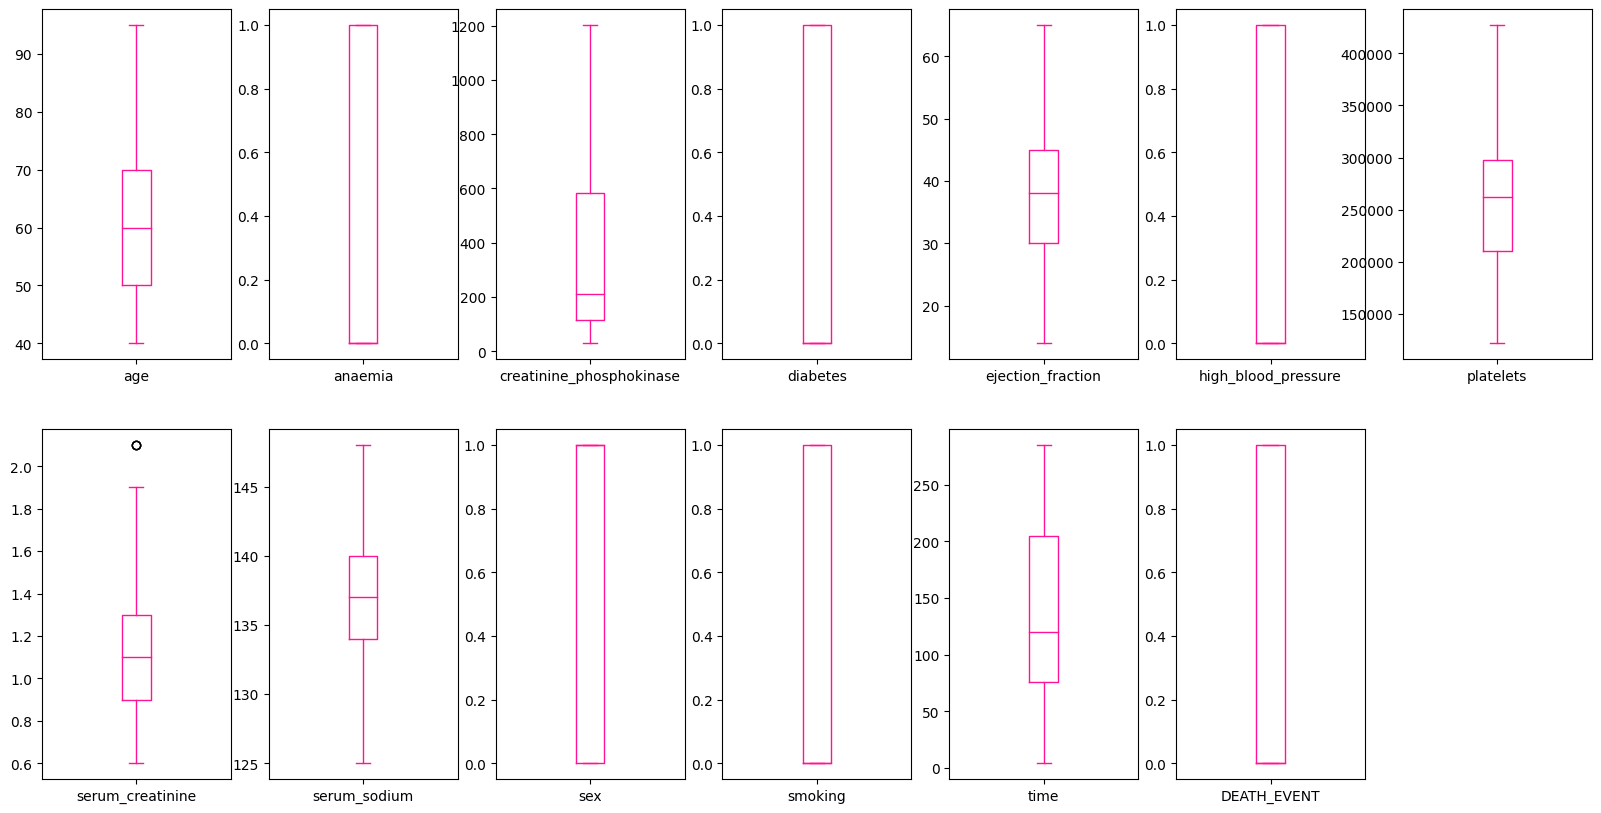

In [ ]:
df.plot(kind='box', subplots=True,layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');


In [ ]:
df.shape

(224, 13)

0    163
1     61
Name: DEATH_EVENT, dtype: int64


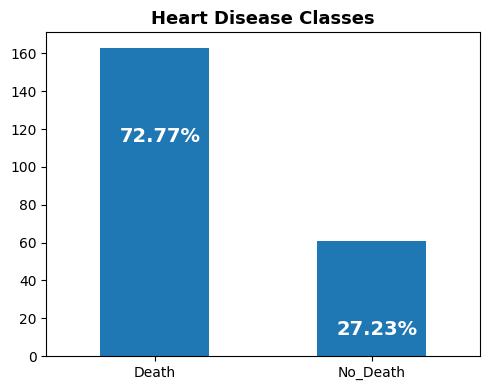

In [ ]:
print(df.DEATH_EVENT.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Death", "No_Death"]
ax = df.DEATH_EVENT.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
          color='white', weight = 'bold')
plt.tight_layout()

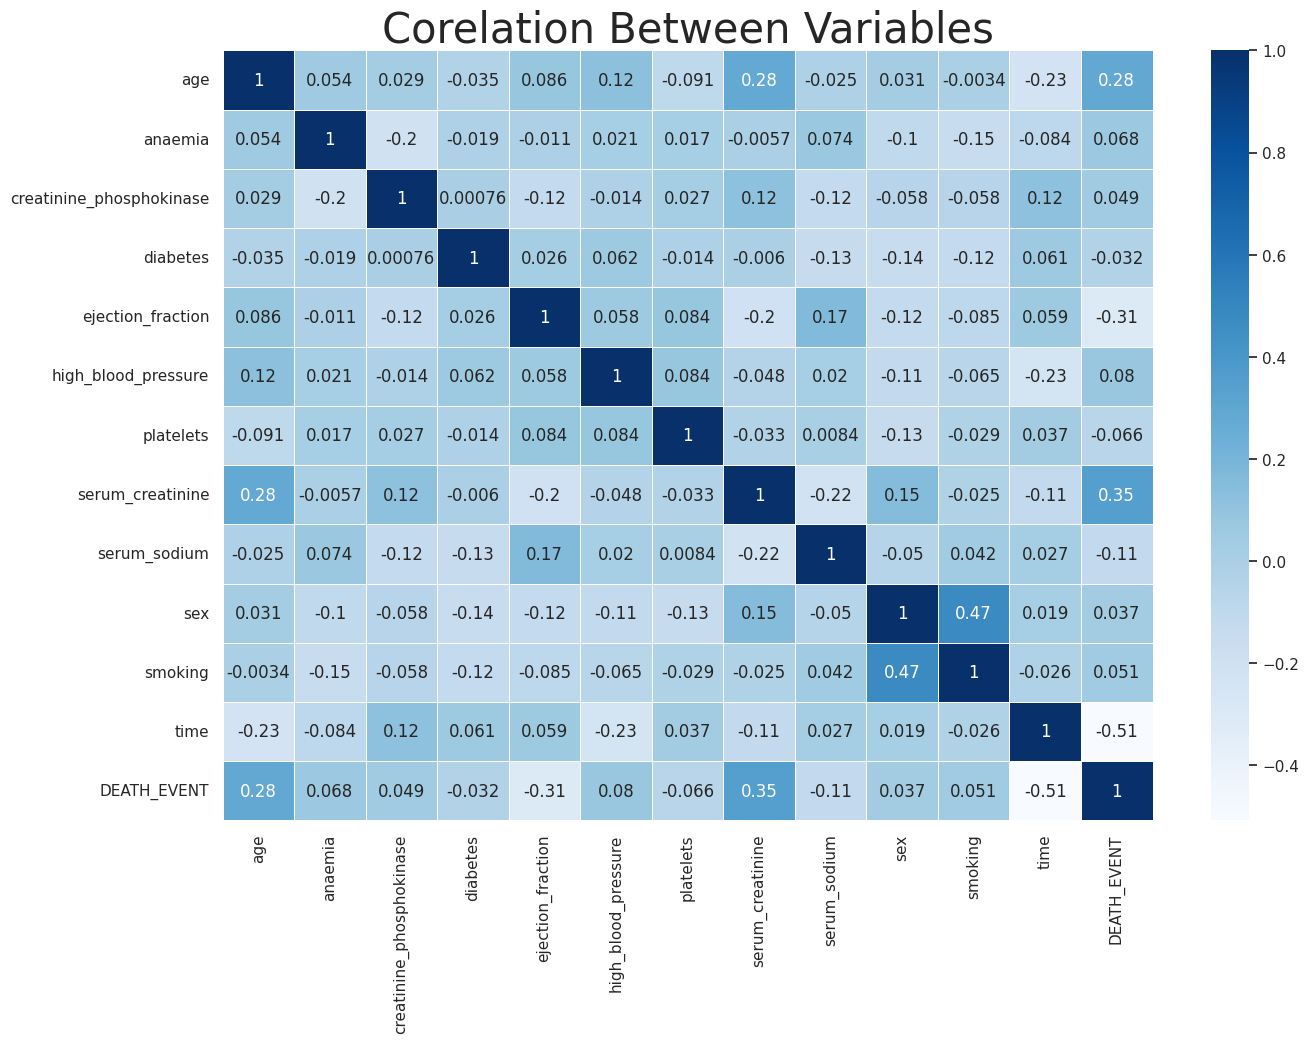

In [ ]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Heart Failure EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
5    90.0        1                        47         0                 40   
6    75.0        1                       246         0                 15   
..    ...      ...                       ...       ...                ...   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1   265000.0               1.9           130    1   
2                      0   162000.0               1.3           129    1   
3                      0   210000.0               1.9           137    1   
5                      1   204000.0               2.1           132    1   
6                      0   127000.0               1.2           137    1   
..                   ...        ...               ...           ...  ...   
291                    0   133000.0               1.4           139    1   
292                    0   382000.0               1.0           140    1   
293                    0   179000.0               0.9           136    1   
294                    1   155000.0               1.1           143    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
2          1     7            1  
3          0     7            1  
5          1     8            1  
6          0    10            1  
..       ...   ...          ...  
291        0   258            0  
292        1   258            0  
293        1   270            0  
294        1   270            0  
298        1   285            0  

[224 rows x 13 columns]

In [ ]:
class_label =df['DEATH_EVENT']
df = df.drop(['DEATH_EVENT'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['DEATH_EVENT']=class_label
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.636364      0.0                  0.470990       0.0           0.117647   
2    0.454545      0.0                  0.098976       0.0           0.117647   
3    0.181818      1.0                  0.069113       0.0           0.117647   
5    0.909091      1.0                  0.014505       0.0           0.509804   
6    0.636364      1.0                  0.184300       0.0           0.019608   
..        ...      ...                       ...       ...                ...   
291  0.363636      0.0                  0.247440       0.0           0.411765   
292  0.218182      0.0                  0.136519       1.0           0.470588   
293  0.418182      1.0                  0.062287       1.0           0.411765   
294  0.400000      0.0                  0.026451       1.0           0.470588   
298  0.181818      0.0                  0.141638       0.0           0.607843   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1.0   0.468852          0.866667      0.217391  1.0   
2                    0.0   0.131148          0.466667      0.173913  1.0   
3                    0.0   0.288525          0.866667      0.521739  1.0   
5                    1.0   0.268852          1.000000      0.304348  1.0   
6                    0.0   0.016393          0.400000      0.521739  1.0   
..                   ...        ...               ...           ...  ...   
291                  0.0   0.036066          0.533333      0.608696  1.0   
292                  0.0   0.852459          0.266667      0.652174  1.0   
293                  0.0   0.186885          0.200000      0.478261  1.0   
294                  1.0   0.108197          0.333333      0.782609  1.0   
298                  0.0   0.895082          0.666667      0.478261  1.0   

     smoking      time  DEATH_EVENT  
0        0.0  0.000000            1  
2        1.0  0.010676            1  
3        0.0  0.010676            1  
5        1.0  0.014235            1  
6        0.0  0.021352            1  
..       ...       ...          ...  
291      0.0  0.903915            0  
292      1.0  0.903915            0  
293      1.0  0.946619            0  
294      1.0  0.946619            0  
298      1.0  1.000000            0  

[224 rows x 13 columns]

In [ ]:
#pre-processing
heart_data = df.copy()
le = preprocessing.LabelEncoder()
age = le.fit_transform(list(heart_data["age"])) # age in years
anaemia = le.fit_transform(list(heart_data["anaemia"])) # gender (1 = male; 0 = female)
creatinine_phosphokinase = le.fit_transform(list(heart_data["creatinine_phosphokinase"])) # chest-pain and chest-pain type
diabetes = le.fit_transform(list(heart_data["diabetes"])) # resting blood pressure(mm/Hg)
ejection_fraction = le.fit_transform(list(heart_data["ejection_fraction"])) # serum cholestrol (mg/dl)
high_blood_pressure = le.fit_transform(list(heart_data["high_blood_pressure"])) # fasting blood sugar
platelets = le.fit_transform(list(heart_data["platelets"])) # resting elctrocardiographic results
serum_creatinine = le.fit_transform(list(heart_data["serum_creatinine"]))
serum_sodium = le.fit_transform(list(heart_data["serum_sodium"]))
sex = le.fit_transform(list(heart_data["sex"]))
smoking = le.fit_transform(list(heart_data["smoking"]))
time = le.fit_transform(list(heart_data["time"]))
DEATH_EVENT = le.fit_transform(list(heart_data["DEATH_EVENT"]))


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
x = list(zip(age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time))
y = list(DEATH_EVENT)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows
#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)


((179, 12), (45, 12))

In [ ]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
NB: 0.821429 (0.040856)

SVM: 0.832381 (0.024918)

GBM: 0.832540 (0.016342)

RF: 0.860476 (0.016583)



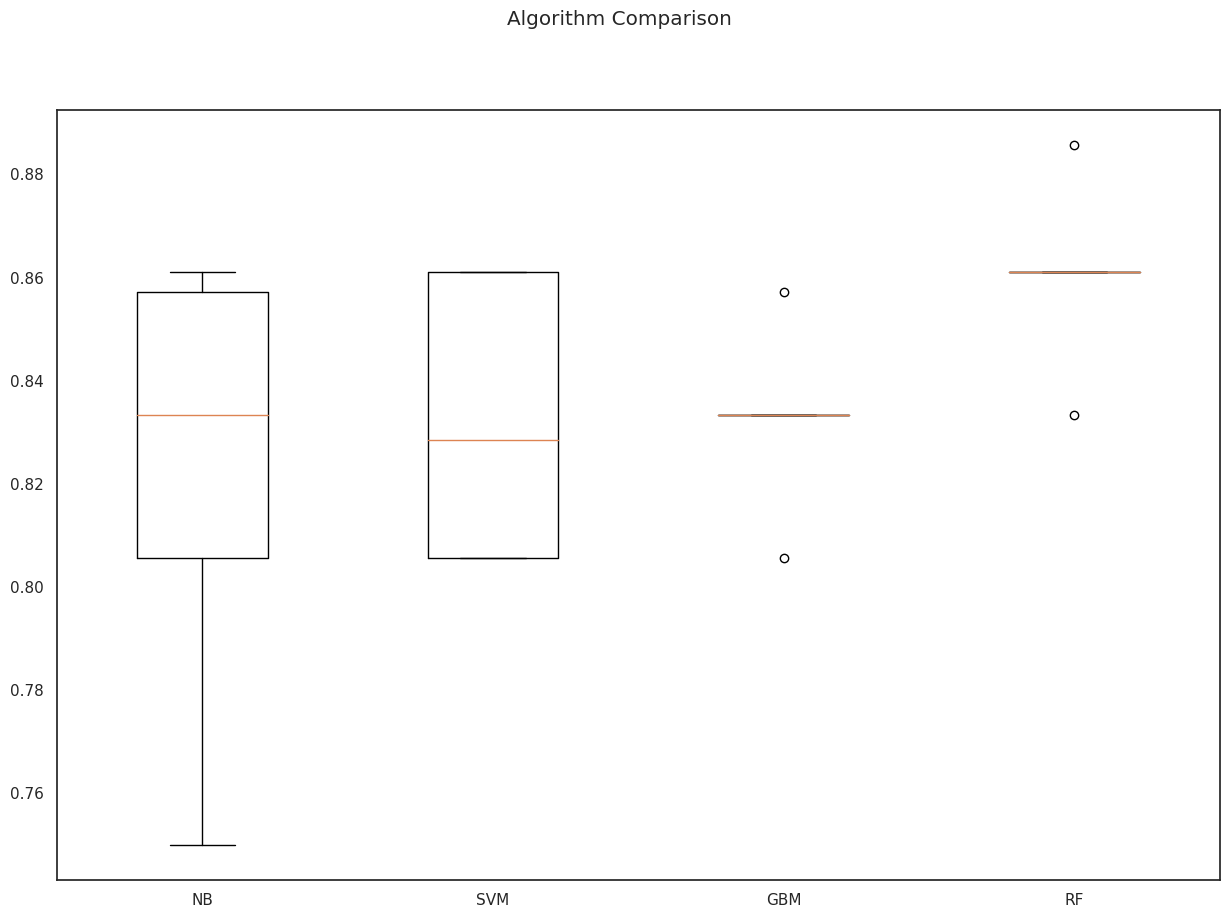

In [ ]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
best_model = rf
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 0.8222222222222222


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.60      0.33      0.43         9

    accuracy                           0.82        45
   macro avg       0.72      0.64      0.66        45
weighted avg       0.80      0.82      0.80        45



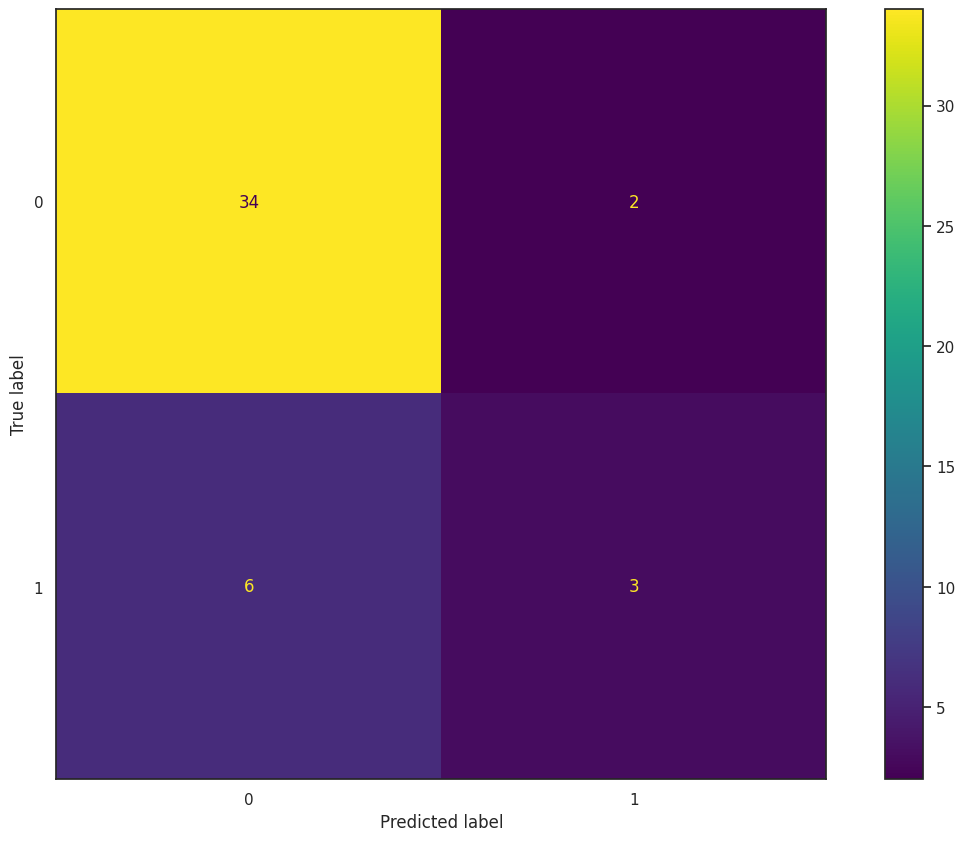

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


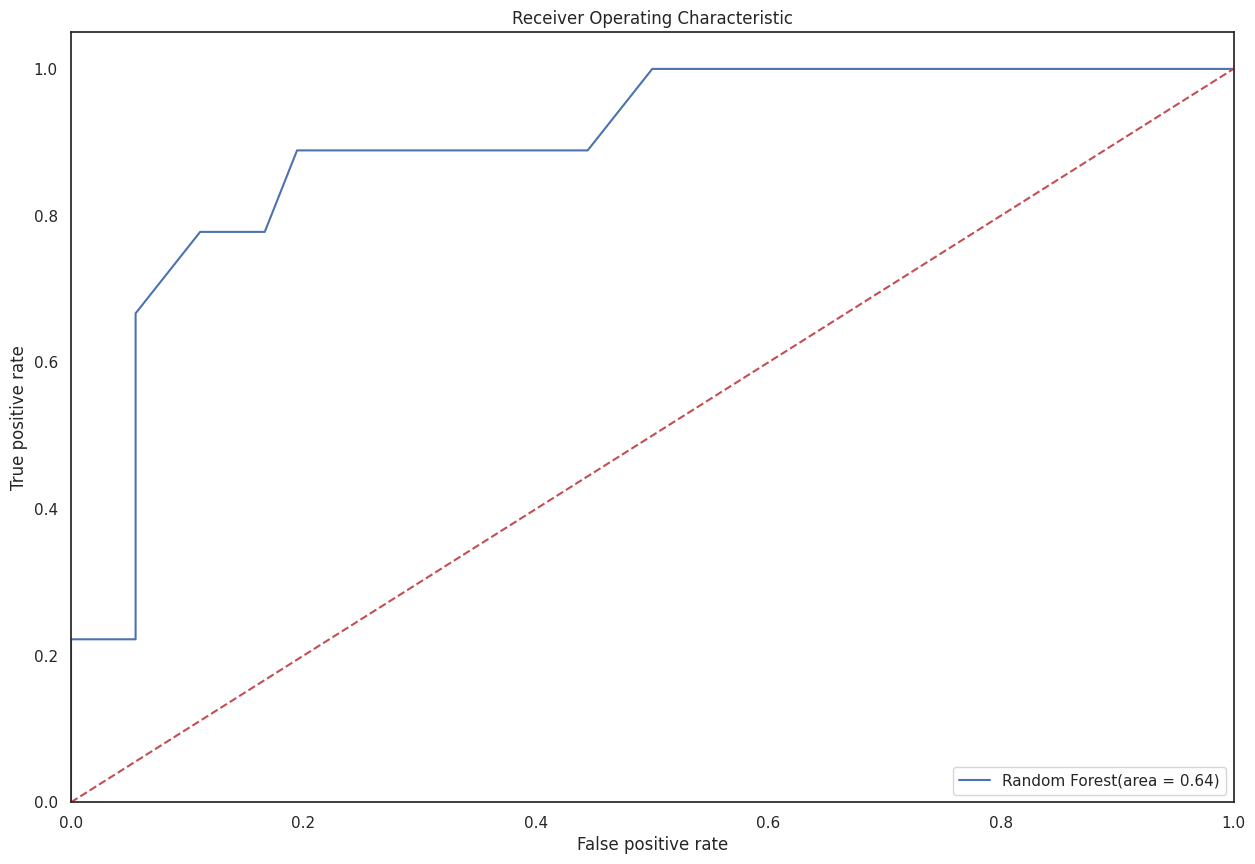

In [ ]:
#Model Evaluation Metric 3- ROC-AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)
[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()


In [ ]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

Predicted:  0 Actual:  0 Data:  (15, 0, 1, 0, 6, 1, 17, 6, 12, 1, 0, 40)
Predicted:  0 Actual:  0 Data:  (5, 0, 104, 1, 12, 1, 125, 5, 11, 1, 0, 81)
Predicted:  0 Actual:  0 Data:  (34, 0, 123, 0, 8, 0, 69, 7, 12, 1, 0, 54)
Predicted:  0 Actual:  0 Data:  (2, 0, 123, 0, 12, 0, 69, 7, 12, 0, 0, 42)
Predicted:  0 Actual:  0 Data:  (13, 0, 78, 0, 12, 0, 42, 1, 8, 1, 1, 66)
Predicted:  0 Actual:  0 Data:  (27, 1, 18, 0, 8, 1, 56, 8, 9, 1, 0, 64)
Predicted:  0 Actual:  0 Data:  (24, 0, 77, 0, 12, 1, 90, 9, 20, 1, 1, 54)
Predicted:  1 Actual:  0 Data:  (10, 1, 66, 1, 5, 0, 95, 8, 13, 0, 0, 16)
Predicted:  0 Actual:  0 Data:  (6, 0, 133, 0, 8, 1, 69, 7, 12, 0, 0, 54)
Predicted:  0 Actual:  0 Data:  (26, 0, 123, 1, 5, 0, 59, 9, 11, 1, 1, 99)
Predicted:  1 Actual:  1 Data:  (5, 0, 123, 0, 0, 0, 15, 3, 2, 1, 0, 6)
Predicted:  0 Actual:  0 Data:  (26, 1, 103, 0, 4, 0, 92, 6, 16, 1, 0, 46)
Predicted:  0 Actual:  0 Data:  (15, 0, 9, 0, 6, 0, 48, 8, 10, 1, 1, 48)
Predicted:  1 Actual:  1 Data:  (10,